In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GroupShuffleSplit
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras import backend as K
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

KNN model: ensure that all rows with the same patient_id stay together

In [3]:
data = pd.read_csv('feature_output_normalized.csv')

X = data[['asymmetry_1', 'asymmetry_2', 'border_irregularity', 'color_asymmetry_1', 
            'color_asymmetry_2', 'texture_contrast', 'texture_dissemilarity']]
data['diagnostic'] = data['diagnostic'].map({'NOT': 0, 'MEL': 1})
y = data['diagnostic']

groups = data['patient_id']

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

train_val_idx, test_idx = next(gss.split(X, y, groups))

X_train_val, X_test = X.iloc[train_val_idx], X.iloc[test_idx]
y_train_val, y_test = y.iloc[train_val_idx], y.iloc[test_idx]

gss_val = GroupShuffleSplit(n_splits=1, test_size=0.25, random_state=123)

train_idx, val_idx = next(gss_val.split(X_train_val, y_train_val, groups[train_val_idx]))

X_train, X_val = X_train_val.iloc[train_idx], X_train_val.iloc[val_idx]
y_train, y_val = y_train_val.iloc[train_idx], y_train_val.iloc[val_idx]

KNN-1 and KNN-5

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)

y_val_pred_knn1 = knn1.predict(X_val)
y_test_pred_knn1 = knn1.predict(X_test)

val_accuracy_knn1 = accuracy_score(y_val, y_val_pred_knn1)
test_accuracy_knn1 = accuracy_score(y_test, y_test_pred_knn1)

val_precision_knn1 = precision_score(y_val, y_val_pred_knn1)
test_precision_knn1 = precision_score(y_test, y_test_pred_knn1)

val_recall_knn1 = recall_score(y_val, y_val_pred_knn1)
test_recall_knn1 = recall_score(y_test, y_test_pred_knn1)

print("KNN-1 validation accuracy: ", val_accuracy_knn1)
print("KNN-1 test accuracy: ", test_accuracy_knn1)
print("KNN-1 validation precision: ", val_precision_knn1)
print("KNN-1 test precision: ", test_precision_knn1)
print("KNN-1 validation recall: ", val_recall_knn1)
print("KNN-1 test recall: ", test_recall_knn1)

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)

y_val_pred_knn5 = knn5.predict(X_val)
y_test_pred_knn5 = knn5.predict(X_test)

val_accuracy_knn5 = accuracy_score(y_val, y_val_pred_knn5)
test_accuracy_knn5 = accuracy_score(y_test, y_test_pred_knn5)

val_precision_knn5 = precision_score(y_val, y_val_pred_knn5)
test_precision_knn5 = precision_score(y_test, y_test_pred_knn5)

val_recall_knn5 = recall_score(y_val, y_val_pred_knn5)
test_recall_knn5 = recall_score(y_test, y_test_pred_knn5)

print("KNN-5 validation accuracy: ", val_accuracy_knn5)
print("KNN-5 test accuracy: ", test_accuracy_knn5)
print("KNN-5 validation precision: ", val_precision_knn5)
print("KNN-5 test precision: ", test_precision_knn5)
print("KNN-5 validation recall: ", val_recall_knn5)
print("KNN-5 test recall: ", test_recall_knn5)


KNN-1 validation accuracy:  0.64
KNN-1 test accuracy:  0.48148148148148145
KNN-1 validation precision:  0.4
KNN-1 test precision:  0.5333333333333333
KNN-1 validation recall:  0.5714285714285714
KNN-1 test recall:  0.5333333333333333
KNN-5 validation accuracy:  0.64
KNN-5 test accuracy:  0.5925925925925926
KNN-5 validation precision:  0.25
KNN-5 test precision:  0.7
KNN-5 validation recall:  0.14285714285714285
KNN-5 test recall:  0.4666666666666667


Shallow neural network with one hidden layer


In [5]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', precision_m, recall_m])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)

y_val_pred_nn = (model.predict(X_val) > 0.5).astype('int32')
y_test_pred_nn = (model.predict(X_test) > 0.5).astype('int32')

val_accuracy_nn = accuracy_score(y_val, y_val_pred_nn)
test_accuracy_nn = accuracy_score(y_test, y_test_pred_nn)

val_precision_nn = precision_score(y_val, y_val_pred_nn)
test_precision_nn = precision_score(y_test, y_test_pred_nn)

val_recall_nn = recall_score(y_val, y_val_pred_nn)
test_recall_nn = recall_score(y_test, y_test_pred_nn)

print("Neural Network validation accuracy: ", val_accuracy_nn)
print("Neural Network test accuracy: ", test_accuracy_nn)
print("Neural Network validation precision: ", val_precision_nn)
print("Neural Network test precision: ", test_precision_nn)
print("Neural Network validation recall: ", val_recall_nn)
print("Neural Network test recall: ", test_recall_nn)

1/1 [==============================] - 0s 21ms/step
Neural Network validation accuracy:  0.72
Neural Network test accuracy:  0.4444444444444444
Neural Network validation precision:  0.0
Neural Network test precision:  0.0
Neural Network validation recall:  0.0
Neural Network test recall:  0.0


c:\Users\jackh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jackh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree

In [13]:
clf = DecisionTreeClassifier(random_state=0, max_depth=5)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)

y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

print("Training Set:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)

print("\nTest Set:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)

Training Set:
Accuracy: 0.872093023255814
Precision: 0.88
Recall: 0.7333333333333333

Test Set:
Accuracy: 0.5925925925925926
Precision: 0.6666666666666666
Recall: 0.5333333333333333


KNN-5 with top scoring features only

In [ ]:
selected_features = ['asymmetry_1', 'asymmetry_2', 'color_asymmetry_1', 'border_irregularity']
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_selected, y_train)

y_val_pred_knn5 = knn5.predict(X_val_selected)
y_test_pred_knn5 = knn5.predict(X_test_selected)

val_accuracy_knn5 = accuracy_score(y_val, y_val_pred_knn5)
test_accuracy_knn5 = accuracy_score(y_test, y_test_pred_knn5)

val_precision_knn5 = precision_score(y_val, y_val_pred_knn5)
test_precision_knn5 = precision_score(y_test, y_test_pred_knn5)

val_recall_knn5 = recall_score(y_val, y_val_pred_knn5)
test_recall_knn5 = recall_score(y_test, y_test_pred_knn5)

print("KNN-5 with selected features validation accuracy: ", val_accuracy_knn5)
print("KNN-5 with selected features test accuracy: ", test_accuracy_knn5)
print("KNN-5 with selected features validation precision: ", val_precision_knn5)
print("KNN-5 with selected features test precision: ", test_precision_knn5)
print("KNN-5 with selected features validation recall: ", val_recall_knn5)
print("KNN-5 with selected features test recall: ", test_recall_knn5)


KNN-5 with selected features validation accuracy:  0.76
KNN-5 with selected features test accuracy:  0.7407407407407407
KNN-5 with selected features validation precision:  0.6
KNN-5 with selected features test precision:  0.8333333333333334
KNN-5 with selected features validation recall:  0.42857142857142855
KNN-5 with selected features test recall:  0.6666666666666666


Decision tree with top scoring features only

In [14]:
data = pd.read_csv('feature_output_normalized.csv')

selected_features = ['asymmetry_1', 'asymmetry_2', 'color_asymmetry_1', 'border_irregularity']
X = data[selected_features]
data['diagnostic'] = data['diagnostic'].map({'NOT': 0, 'MEL': 1})
y = data['diagnostic']

groups = data['patient_id']

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
train_val_idx, test_idx = next(gss.split(X, y, groups))
X_train_val, X_test = X.iloc[train_val_idx], X.iloc[test_idx]
y_train_val, y_test = y.iloc[train_val_idx], y.iloc[test_idx]

gss_val = GroupShuffleSplit(n_splits=1, test_size=0.25, random_state=123)
train_idx, val_idx = next(gss_val.split(X_train_val, y_train_val, groups[train_val_idx]))
X_train, X_val = X_train_val.iloc[train_idx], X_train_val.iloc[val_idx]
y_train, y_val = y_train_val.iloc[train_idx], y_train_val.iloc[val_idx]

clf_selected = DecisionTreeClassifier(random_state=0, max_depth=5)
clf_selected.fit(X_train, y_train)

y_train_pred_selected = clf_selected.predict(X_train)
train_accuracy_selected = accuracy_score(y_train, y_train_pred_selected)
train_precision_selected = precision_score(y_train, y_train_pred_selected)
train_recall_selected = recall_score(y_train, y_train_pred_selected)

y_test_pred_selected = clf_selected.predict(X_test)
test_accuracy_selected = accuracy_score(y_test, y_test_pred_selected)
test_precision_selected = precision_score(y_test, y_test_pred_selected)
test_recall_selected = recall_score(y_test, y_test_pred_selected)

print("Training Set (Selected Features Only):")
print("Accuracy:", train_accuracy_selected)
print("Precision:", train_precision_selected)
print("Recall:", train_recall_selected)

print("\nTest Set (Selected Features Only):")
print("Accuracy:", test_accuracy_selected)
print("Precision:", test_precision_selected)
print("Recall:", test_recall_selected)

Training Set (Selected Features Only):
Accuracy: 0.872093023255814
Precision: 0.88
Recall: 0.7333333333333333

Test Set (Selected Features Only):
Accuracy: 0.5925925925925926
Precision: 0.6666666666666666
Recall: 0.5333333333333333


KNN-5 with top scoring features only without validation set

Test accuracy: 0.7407407407407407
Confusion Matrix: 
 [[10  2]
 [ 5 10]]


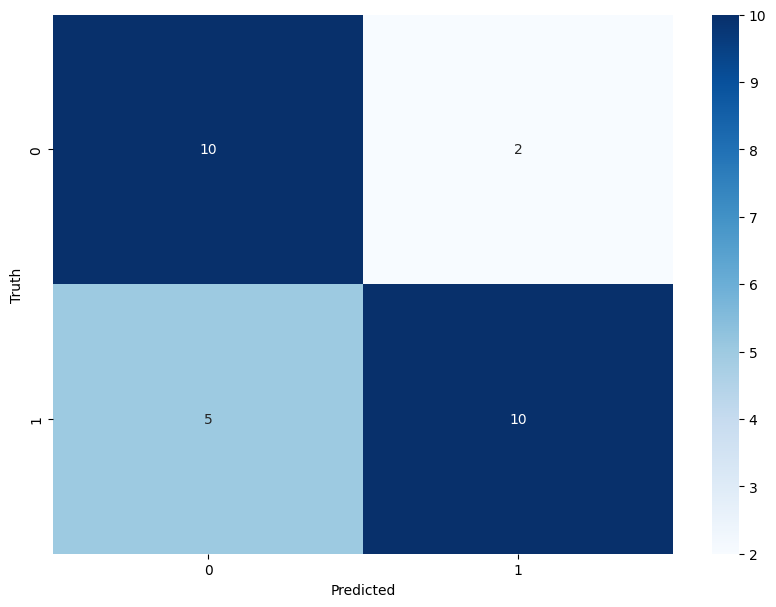

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

data = pd.read_csv('feature_output_normalized.csv')

X = data[['asymmetry_1', 'asymmetry_2', 'border_irregularity', 'color_asymmetry_1', 
            'color_asymmetry_2', 'texture_contrast', 'texture_dissemilarity']]
data['diagnostic'] = data['diagnostic'].map({'NOT': 0, 'MEL': 1})
y = data['diagnostic']

groups = data['patient_id']

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

train_idx, test_idx = next(gss.split(X, y, groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


selected_features = ['asymmetry_1', 'asymmetry_2', 'color_asymmetry_1', 'border_irregularity']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_selected, y_train)

y_test_pred_knn5 = knn5.predict(X_test_selected)

test_accuracy_knn5 = accuracy_score(y_test, y_test_pred_knn5)

print("Test accuracy:", test_accuracy_knn5)

cm = confusion_matrix(y_test, y_test_pred_knn5)
print("Confusion Matrix: \n", cm)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [1]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score, recall_score

y_test_prob_knn5 = knn5.predict_proba(X_test_selected)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob_knn5)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

precision, recall, thresholds_pr = precision_recall_curve(y_test, y_test_prob_knn5)

fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
optimal_threshold = thresholds_pr[ix]

y_test_pred_optimal = np.where(y_test_prob_knn5 >= optimal_threshold, 1, 0)

test_accuracy_optimal = accuracy_score(y_test, y_test_pred_optimal)
test_recall_optimal = recall_score(y_test, y_test_pred_optimal)

print("Optimal Threshold:", optimal_threshold)
print("Test accuracy with optimal threshold:", test_accuracy_optimal)
print("Test recall with optimal threshold:", test_recall_optimal)


NameError: name 'knn5' is not defined

In [ ]:
y_test_pred_optimal = np.where(y_test_prob_knn5 >= 0.4, 1, 0)

test_accuracy_optimal = accuracy_score(y_test, y_test_pred_optimal)

cm_optimal = confusion_matrix(y_test, y_test_pred_optimal)

print("Test accuracy with optimal threshold:", test_accuracy_optimal)
print("Confusion Matrix with optimal threshold: \n", cm_optimal)

plt.figure(figsize=(10,7))
sns.heatmap(cm_optimal, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()